<a href="https://colab.research.google.com/github/jb-rgb/Notebooks-Google-Colab/blob/main/MLP_Animals_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descargar y configurar el dataset

In [ ]:
# Descargar el dataset desde Kaggle
import kagglehub  # Biblioteca para manejar datasets de Kaggle
import os  # Biblioteca para manejar rutas y directorios

# Descargar el dataset Animals-10 desde Kaggle usando kagglehub
dataset_path = kagglehub.dataset_download("alessiocorrado99/animals10")

# Ruta a la carpeta "raw-img" dentro del dataset descargado
RAW_IMG_PATH = "/root/.cache/kagglehub/datasets/alessiocorrado99/animals10/versions/2/raw-img"

# Imprimir la estructura inicial del dataset
print("Estructura inicial del dataset:")
# Recorrer cada subcarpeta (clase) dentro de "raw-img"
for class_name in os.listdir(RAW_IMG_PATH):
    class_path = os.path.join(RAW_IMG_PATH, class_name)  # Ruta completa de la clase
    # Contar el número de imágenes en cada subcarpeta
    print(f"Clase: {class_name}, Número de imágenes: {len(os.listdir(class_path))}")

Estructura inicial del dataset:
Clase: cavallo, Número de imágenes: 1400
Clase: gatto, Número de imágenes: 1400
Clase: farfalla, Número de imágenes: 1400
Clase: ragno, Número de imágenes: 1400
Clase: gallina, Número de imágenes: 1400
Clase: scoiattolo, Número de imágenes: 1400
Clase: pecora, Número de imágenes: 1400
Clase: elefante, Número de imágenes: 1400
Clase: cane, Número de imágenes: 1400
Clase: mucca, Número de imágenes: 1400


# Limitar las Imágenes a 1400 por Clase

In [ ]:
import random  # Biblioteca para realizar operaciones aleatorias

# Establecer un límite de 1400 imágenes por clase
LIMIT_IMAGES = 1400

# Recorrer cada subcarpeta (clase) dentro de "raw-img"
for class_name in os.listdir(RAW_IMG_PATH):
    class_path = os.path.join(RAW_IMG_PATH, class_name)  # Ruta completa de la clase
    if os.path.isdir(class_path):  # Asegurarse de que sea un directorio (y no un archivo)
        images = os.listdir(class_path)  # Listar todas las imágenes en la carpeta
        random.shuffle(images)  # Mezclar aleatoriamente las imágenes
        # Eliminar las imágenes que excedan el límite establecido (1400)
        for img in images[LIMIT_IMAGES:]:
            os.remove(os.path.join(class_path, img))  # Eliminar la imagen

# Verificar la estructura después de limitar las imágenes
print("\nEstructura del dataset después de limitar las imágenes:")
for class_name in os.listdir(RAW_IMG_PATH):
    class_path = os.path.join(RAW_IMG_PATH, class_name)  # Ruta completa de la clase
    print(f"Clase: {class_name}, Imágenes: {len(os.listdir(class_path))}")  # Contar imágenes restantes


Estructura del dataset después de limitar las imágenes:
Clase: cavallo, Imágenes: 1400
Clase: gatto, Imágenes: 1400
Clase: farfalla, Imágenes: 1400
Clase: ragno, Imágenes: 1400
Clase: gallina, Imágenes: 1400
Clase: scoiattolo, Imágenes: 1400
Clase: pecora, Imágenes: 1400
Clase: elefante, Imágenes: 1400
Clase: cane, Imágenes: 1400
Clase: mucca, Imágenes: 1400


# Configurar el Generador de Datos

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generador de datos para imágenes

# Tamaño de las imágenes para redimensionarlas a 128x128
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64  # Tamaño de lote (cantidad de imágenes procesadas en cada paso)

# Configuración del generador de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Escalar los valores de los píxeles a un rango entre 0 y 1
    validation_split=0.2  # Dividir el dataset en 80% entrenamiento y 20% validación
)

# Crear el generador de datos para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    RAW_IMG_PATH,  # Ruta a la carpeta que contiene las subcarpetas de clases
    target_size=IMAGE_SIZE,  # Redimensionar imágenes a 128x128
    batch_size=BATCH_SIZE,  # Procesar imágenes en lotes de 32
    class_mode='categorical',  # Salida categórica para clasificación (10 clases)
    subset='training'  # Subconjunto de entrenamiento
)

# Crear el generador de datos para el conjunto de validación
val_generator = train_datagen.flow_from_directory(
    RAW_IMG_PATH,  # Mismo directorio que el conjunto de entrenamiento
    target_size=IMAGE_SIZE,  # Redimensionar imágenes a 128x128
    batch_size=BATCH_SIZE,  # Procesar imágenes en lotes de 32
    class_mode='categorical',  # Salida categórica para clasificación (10 clases)
    subset='validation'  # Subconjunto de validación
)

Found 11200 images belonging to 10 classes.
Found 2800 images belonging to 10 classes.


# Crear y Compilar el Modelo de Perceptrón Multicapa

In [ ]:
from tensorflow import keras  # Importar TensorFlow y Keras

# Crear el modelo MLP (Perceptrón Multicapa)
model = keras.models.Sequential([  # Usar modelo secuencial
    keras.layers.Flatten(input_shape=[128, 128, 3]),  # Aplanar imágenes de 128x128 con 3 canales (RGB)
    keras.layers.Dense(300, activation='relu'),  # Primera capa densa (300 neuronas, activación ReLU)
    keras.layers.Dense(100, activation='relu'),  # Segunda capa densa (100 neuronas, activación ReLU)
    keras.layers.Dense(10, activation='softmax')  # Capa de salida (10 clases, activación softmax)
])

# Compilar el modelo
model.compile(
    optimizer='adam',  # Optimizador Adam para ajustar los pesos
    loss='categorical_crossentropy',  # Función de pérdida para clasificación multicategoría
    metrics=['accuracy']  # Métrica de evaluación: precisión
)

# Mostrar la arquitectura del modelo
model.summary()  # Imprimir un resumen del modelo

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 49152)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 300)                 │      14,745,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,777,010 (56.37 MB)

 Trainable params: 14,777,010 (56.37 MB)

 Non-trainable params: 0 (0.00 B)

#  Entrenar el Modelo

In [ ]:
# Entrenar el modelo
history = model.fit(
    train_generator,  # Generador de datos de entrenamiento
    epochs=30,  # Número de épocas (veces que el modelo verá todo el dataset)
    validation_data=val_generator  # Generador de datos de validación
)

Epoch 1/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.1264 - loss: 10.7673 - val_accuracy: 0.1736 - val_loss: 2.3893
Epoch 2/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 131ms/step - accuracy: 0.1903 - loss: 2.5597 - val_accuracy: 0.1846 - val_loss: 2.5687
Epoch 3/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 40s 123ms/step - accuracy: 0.2372 - loss: 2.3119 - val_accuracy: 0.2179 - val_loss: 2.4497
Epoch 4/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.2406 - loss: 2.2748 - val_accuracy: 0.2346 - val_loss: 2.1894
Epoch 5/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.2803 - loss: 2.1325 - val_accuracy: 0.2204 - val_loss: 2.3385
Epoch 6/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.2996 - loss: 2.0432 - val_accuracy: 0.2411 - val_loss: 2.3974
Epoch 7/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 22s 121ms/step - accuracy: 0.2962 - loss: 2.0443 - val_accuracy: 0.2164 - val_loss: 2.2216
Epoch 8/30
175/175 ━━━━━━━━━━━━━━━━━━━━ 20s 113ms/step - accuracy: 0.3341 - loss: 

# Evaluar el Modelo y Visualizar Resultados

In [ ]:
# Evaluar el modelo en el conjunto de validación
loss, accuracy = model.evaluate(val_generator)  # Pérdida y precisión en validación
print(f"\nLoss: {loss}, Accuracy: {accuracy}")  # Mostrar los resultados

# Visualizar las métricas de entrenamiento y validación
import matplotlib.pyplot as plt  # Biblioteca para gráficas

44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - accuracy: 0.3244 - loss: 2.1636

Loss: 2.1666181087493896, Accuracy: 0.3253571391105652


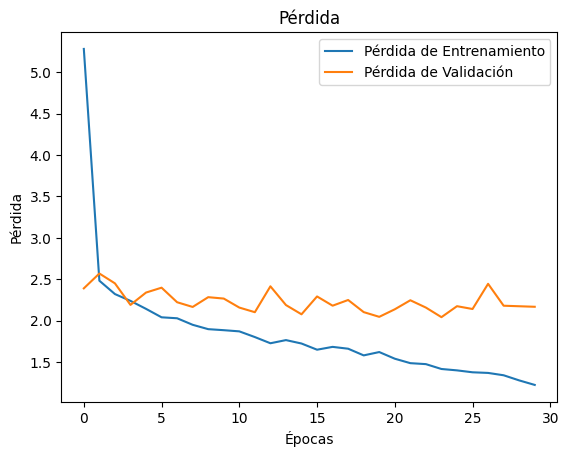

In [ ]:
# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

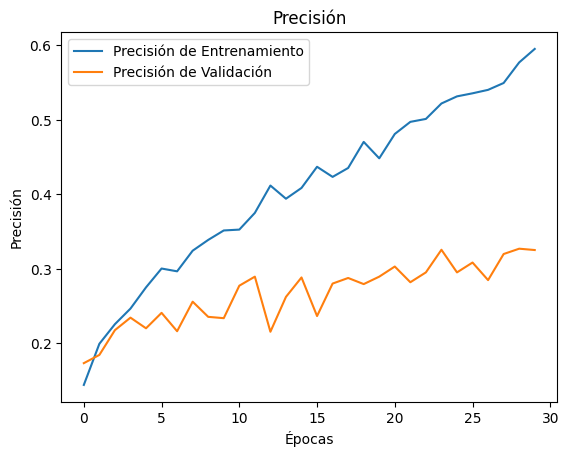

In [ ]:
# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.legend()
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.show()

# Mostrar imágenes con predicciones

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  


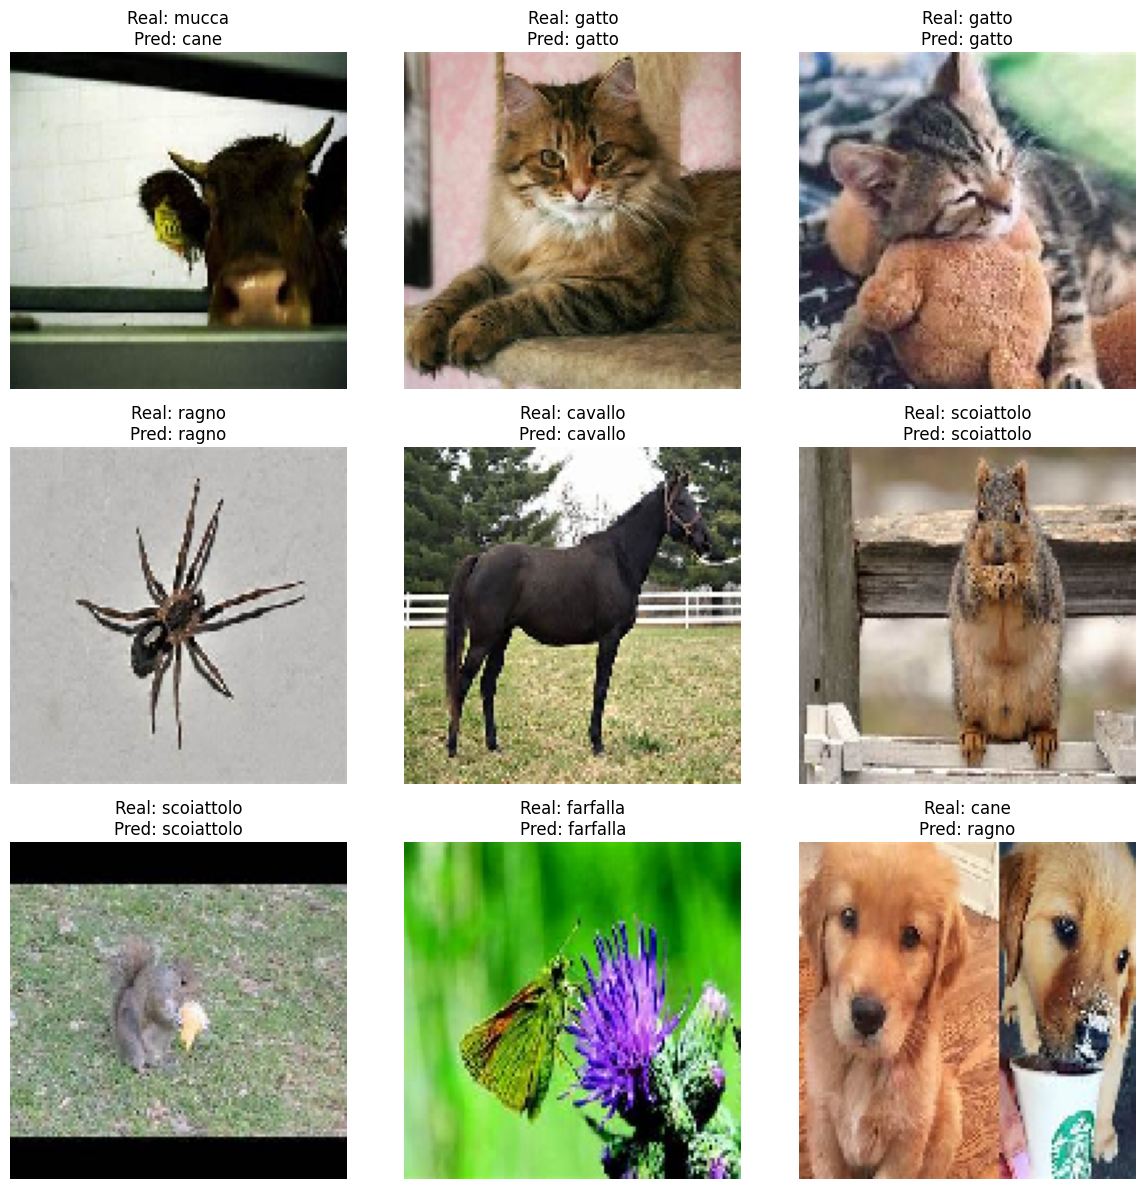

In [ ]:
import numpy as np

# Obtener un lote de imágenes del generador de validación
images, labels = next(val_generator)

# Realizar predicciones
predictions = model.predict(images)
predicted_labels = np.argmax(predictions, axis=1)  # Etiquetas predichas
true_labels = np.argmax(labels, axis=1)  # Etiquetas reales

# Diccionario de clases
class_indices = train_generator.class_indices
classes = list(class_indices.keys())

# Mostrar imágenes con etiquetas reales y predichas
plt.figure(figsize=(12, 12))
for i in range(9):  # Mostrar las primeras 9 imágenes
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Real: {classes[true_labels[i]]}\nPred: {classes[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Crear la matriz de confusión

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
2/2 ━━━━━━━━

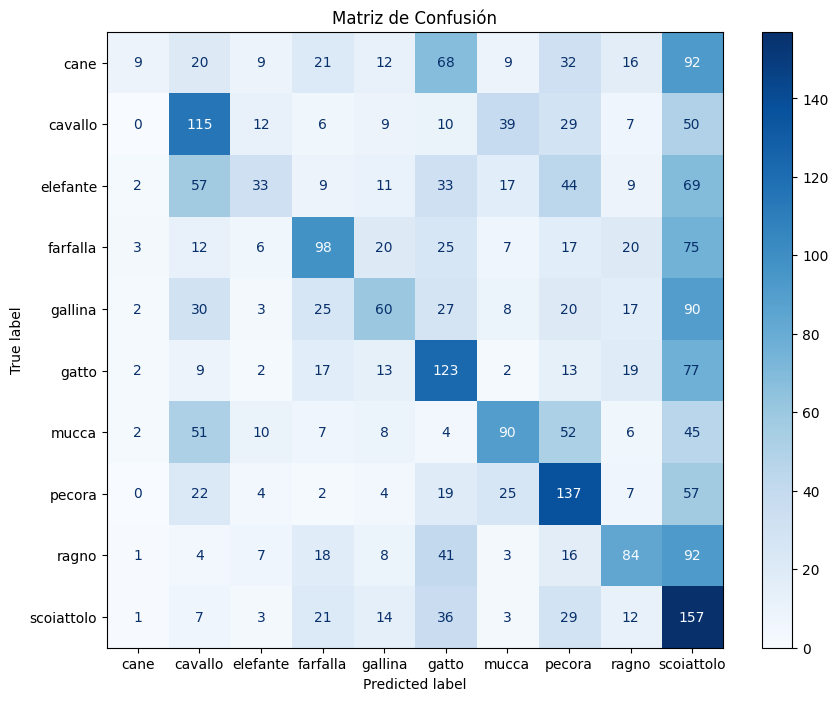

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Crear arreglos para etiquetas
y_true = np.array([])
y_pred = np.array([])

# Procesar todos los datos de validación
for images, labels in val_generator:
    predictions = model.predict(images)  # Predicciones del modelo
    y_true = np.concatenate([y_true, np.argmax(labels, axis=1)])  # Etiquetas reales
    y_pred = np.concatenate([y_pred, np.argmax(predictions, axis=1)])  # Etiquetas predichas

    # Romper el bucle cuando se complete el generador
    if len(y_true) >= val_generator.samples:  # `samples` indica el total de muestras en el generador
        break

# Generar la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Etiquetas de las clases (extraídas del generador)
classes = list(val_generator.class_indices.keys())

# Crear una instancia de ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.title("Matriz de Confusión")
plt.show()

In [ ]:
from sklearn.metrics import  classification_report
# Generar el reporte de clasificación
report = classification_report(y_true, y_pred, target_names=classes)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

        cane       0.41      0.03      0.06       288
     cavallo       0.35      0.42      0.38       277
    elefante       0.37      0.12      0.18       284
    farfalla       0.44      0.35      0.39       283
     gallina       0.38      0.21      0.27       282
       gatto       0.32      0.44      0.37       277
       mucca       0.44      0.33      0.38       275
      pecora       0.35      0.49      0.41       277
       ragno       0.43      0.31      0.36       274
  scoiattolo       0.20      0.55      0.29       283

    accuracy                           0.32      2800
   macro avg       0.37      0.32      0.31      2800
weighted avg       0.37      0.32      0.31      2800



In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 32.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
/usr/local/lib/python3.10/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


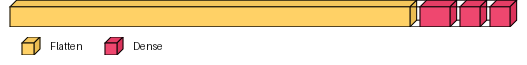

In [ ]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, legend=True, to_file='output.png') # write to disk